Detección de anomalias - Vamos a plantear el uso de la distancia de Mahalanobis y del LOF.

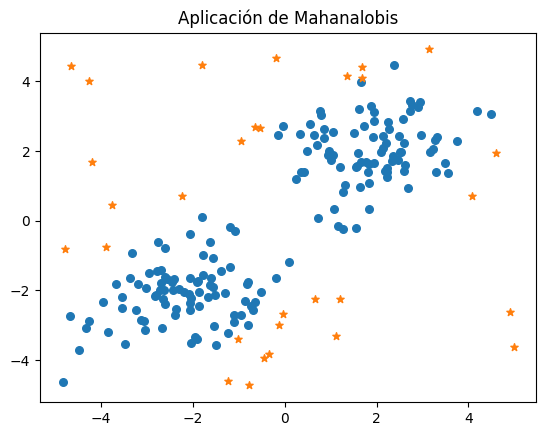

In [1]:
#Carga de librerias necesarias
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

#Definimos el número de datos y los outliers

n=200
f_out=0.15
n_out=int(f_out*n)
n_normales=n-n_out

#Generamos los datos

np.random.seed(111)
X,y = make_blobs(n_samples=n_normales, centers=[[2,2], [-2,-2]])
rng=np.random.RandomState(111)
X = np.concatenate([X, rng.uniform(low=-5, high=5, size=(n_out, 2))], axis=0)
modelo_DB=EllipticEnvelope(contamination=f_out)
estima = modelo_DB.fit(X)
y_pred = estima.predict(X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=30, marker="o")
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], s=30, marker="*")
plt.title("Aplicación de Mahanalobis")
plt.show()

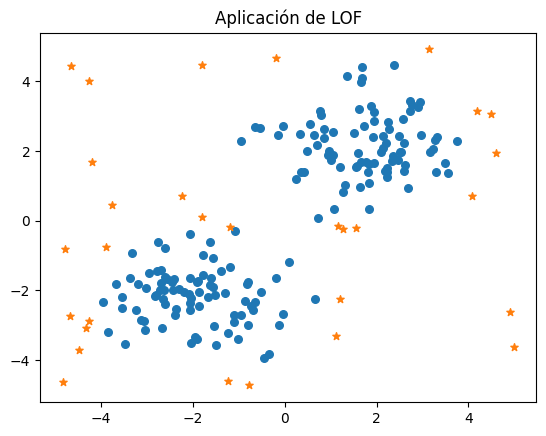

In [2]:
modelo=LocalOutlierFactor(n_neighbors=25, contamination=f_out)
y_pred=modelo.fit_predict(X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=30, marker="o")
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], s=30, marker="*")
plt.title("Aplicación de LOF")  
plt.show()